<a href="https://colab.research.google.com/github/marcosoares-92/IndustrialDataScienceWorkflow/blob/main/model_project/steel_industry_energy_consumption/etl_5_Segg_Mean_Diff_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Seggregation of the Dataset and Mean Difference Analysis**

## _ETL Workflow Notebook 5_

## Content:
1. Calculating general statistics for a given column; 
2. Getting data quantiles for a given column; 
3. Getting a particular P-percent quantile limit for a given column;  
4. Selecting subsets from a dataframe (using row filters) and labelling these subsets; 
5. Performing Analysis of Variance (ANOVA); and obtaining box plots or violin plots.

Marco Cesar Prado Soares, Data Scientist Specialist - Bayer Crop Science LATAM
- marcosoares.feq@gmail.com
- marco.soares@bayer.com

## **Load Python Libraries in Global Context**

In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 15.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 15.8 MB/s 
     |████████████████████████████████| 944 kB 67.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# Run installed library
import pandas as pd
import numpy as np
from statsmodels.stats.oneway import anova_oneway
import idsw
from idsw import etl
from idsw.etl import etl_workflow as ewf

In [ ]:
# Run Python files
import pandas as pd
import numpy as np
from statsmodels.stats.oneway import anova_oneway
import idsw
from etl import etl_workflow as ewf

## **Call the functions**

### **Mounting Google Drive or S3 (AWS Simple Storage Service) bucket**

In [ ]:
SOURCE = 'google'
# SOURCE = 'google' for mounting the google drive;
# SOURCE = 'aws' for accessing an AWS S3 bucket

## THE FOLLOWING PARAMETERS HAVE EFFECT ONLY WHEN SOURCE == 'aws':

PATH_TO_STORE_IMPORTED_S3_BUCKET = ''
# PATH_TO_STORE_IMPORTED_S3_BUCKET: path of the Python environment to which the
# S3 bucket contents will be imported. If it is None; or if it is an empty string; or if 
# PATH_TO_STORE_IMPORTED_S3_BUCKET = '/', bucket will be imported to the root path. 
# Alternatively, input the path as a string (in quotes). e.g. 
# PATH_TO_STORE_IMPORTED_S3_BUCKET = 'copied_s3_bucket'

S3_BUCKET_NAME = 'my_bucket'
## This parameter is obbligatory to access an AWS S3 bucket. Substitute it for a string
# with the bucket's name. e.g. s3_bucket_name = "aws-bucket-1" access a bucket named as
# "aws-bucket-1"

S3_OBJECT_FOLDER_PREFIX = ""
# S3_OBJECT_FOLDER_PREFIX = None. Keep it None; or as an empty string 
# (S3_OBJECT_FOLDER_PREFIX = ''); or as the root "/" to import the 
# whole bucket content, instead of a single object from it.
# Alternatively, set it as a string containing the subfolder from the bucket to import:
# Suppose that your bucket (admin-created) has four objects with the following object 
# keys: Development/Projects1.xls; Finance/statement1.pdf; Private/taxdocument.pdf; and
# s3-dg.pdf. 
# The s3-dg.pdf key does not have a prefix, so its object appears directly 
# at the root level of the bucket. If you open the Development/ folder, you see 
# the Projects.xlsx object in it.
# In summary, if the path of the file is: 'bucket/my_path/.../file.csv'
# where 'bucket' is the bucket's name, prefix = 'my_path/.../', without the
# 'file.csv' (file name with extension) last part.

# So, declare the prefix as S3_OBJECT_FOLDER_PREFIX to import only files from
# a given folder (directory) of the bucket.
# DO NOT PUT A SLASH before (to the right of) the prefix;
# DO NOT ADD THE BUCKET'S NAME TO THE right of the prefix:
# S3_OBJECT_FOLDER_PREFIX = "bucket_directory1/.../bucket_directoryN/"

# Alternatively, provide the full path of a given file if you want to import only it:
# S3_OBJECT_FOLDER_PREFIX = "bucket_directory1/.../bucket_directoryN/my_file.ext"
# where my_file is the file's name, and ext is its extension.


# Attention: after running this function for fetching AWS Simple Storage System (S3), 
# your 'AWS Access key ID' and your 'Secret access key' will be requested.
# The 'Secret access key' will be hidden through dots, so it cannot be visualized or copied by
# other users. On the other hand, the same is not true for 'Access key ID', the bucket's name 
# and the prefix. All of these are sensitive information from the organization.
# Therefore, after importing the information, always remember of cleaning the output of this cell
# and of removing such information from the strings.
# Remember that these data may contain privilege for accessing protected information, 
# so it should not be used for non-authorized people.

# Also, remember of deleting the imported files from the workspace after finishing the analysis.
# The costs for storing the files in S3 is quite inferior than those for storing directly in the
# workspace. Also, files stored in S3 may be accessed for other users than those with access to
# the notebook's workspace.
idsw.mount_storage_system (source = SOURCE, path_to_store_imported_s3_bucket = PATH_TO_STORE_IMPORTED_S3_BUCKET, s3_bucket_name = S3_BUCKET_NAME, s3_obj_prefix = S3_OBJECT_FOLDER_PREFIX)

Associate the Python environment to your Google Drive account, and authorize the access in the opened window.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Now your Python environment is connected to your Google Drive: the root directory of your environment is now the root of your Google Drive.
In Google Colab, navigate to the folder icon ('Files') of the left navigation menu to find a specific folder or file in your Google Drive.
Click on the folder or file name and select the elipsis (...) icon on the right of the name to reveal the option 'Copy path', which will give you the path to use as input for loading objects and files on your Python environment.
Caution: save your files into different directories of the Google Drive. If files are all saved in a same folder or directory, like the root path, they may not be accessible from your Python environment.
If you still cannot see the file after moving it 

### **Importing the dataset**

In [ ]:
## WARNING: Use this function to load dataframes stored on Excel (xls, xlsx, xlsm, xlsb, odf, ods and odt), 
## JSON, txt, or CSV (comma separated values) files.

FILE_DIRECTORY_PATH = "/content/drive/MyDrive/model_project/steel_industry_energy_consumption"
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = "" 
# or FILE_DIRECTORY_PATH = "folder"

FILE_NAME_WITH_EXTENSION = "dataset_transformed_log.csv"
# FILE_NAME_WITH_EXTENSION - (string, in quotes): input the name of the file with the 
# extension. e.g. FILE_NAME_WITH_EXTENSION = "file.xlsx", or, 
# FILE_NAME_WITH_EXTENSION = "file.csv", "file.txt", or "file.json"
# Again, the extensions may be: xls, xlsx, xlsm, xlsb, odf, ods, odt, json, txt or csv.

LOAD_TXT_FILE_WITH_JSON_FORMAT = False
# LOAD_TXT_FILE_WITH_JSON_FORMAT = False. Set LOAD_TXT_FILE_WITH_JSON_FORMAT = True 
# if you want to read a file with txt extension containing a text formatted as JSON 
# (but not saved as JSON).
# WARNING: if LOAD_TXT_FILE_WITH_JSON_FORMAT = True, all the JSON file parameters of the 
# function (below) must be set. If not, an error message will be raised.

HOW_MISSING_VALUES_ARE_REGISTERED = None
# HOW_MISSING_VALUES_ARE_REGISTERED = None: keep it None if missing values are registered as None,
# empty or np.nan. Pandas automatically converts None to NumPy np.nan objects (floats).
# This parameter manipulates the argument na_values (default: None) from Pandas functions.
# By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, 
#‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, 
# ‘n/a’, ‘nan’, ‘null’.

# If a different denomination is used, indicate it as a string. e.g.
# HOW_MISSING_VALUES_ARE_REGISTERED = '.' will convert all strings '.' to missing values;
# HOW_MISSING_VALUES_ARE_REGISTERED = 0 will convert zeros to missing values.

# If dict passed, specific per-column NA values. For example, if zero is the missing value
# only in column 'numeric_col', you can specify the following dictionary:
# how_missing_values_are_registered = {'numeric-col': 0}

    
HAS_HEADER = True
# HAS_HEADER = True if the the imported table has headers (row with columns names).
# Alternatively, HAS_HEADER = False if the dataframe does not have header.

DECIMAL_SEPARATOR = '.'
# DECIMAL_SEPARATOR = '.' - String. Keep it '.' or None to use the period ('.') as
# the decimal separator. Alternatively, specify here the separator.
# e.g. DECIMAL_SEPARATOR = ',' will set the comma as the separator.
# It manipulates the argument 'decimal' from Pandas functions.

TXT_CSV_COL_SEP = "comma"
# txt_csv_col_sep = "comma" - This parameter has effect only when the file is a 'txt'
# or 'csv'. It informs how the different columns are separated.
# Alternatively, txt_csv_col_sep = "comma", or txt_csv_col_sep = "," 
# for columns separated by comma;
# txt_csv_col_sep = "whitespace", or txt_csv_col_sep = " " 
# for columns separated by simple spaces.
# You can also set a specific separator as string. For example:
# txt_csv_col_sep = '\s+'; or txt_csv_col_sep = '\t' (in this last example, the tabulation
# is used as separator for the columns - '\t' represents the tab character).

## Parameters for loading Excel files:

LOAD_ALL_SHEETS_AT_ONCE = False
# LOAD_ALL_SHEETS_AT_ONCE = False - This parameter has effect only when for Excel files.
# If LOAD_ALL_SHEETS_AT_ONCE = True, the function will return a list of dictionaries, each
# dictionary containing 2 key-value pairs: the first key will be 'sheet', and its
# value will be the name (or number) of the table (sheet). The second key will be 'df',
# and its value will be the pandas dataframe object obtained from that sheet.
# This argument has preference over SHEET_TO_LOAD. If it is True, all sheets will be loaded.
    
SHEET_TO_LOAD = None
# SHEET_TO_LOAD - This parameter has effect only when for Excel files.
# keep SHEET_TO_LOAD = None not to specify a sheet of the file, so that the first sheet
# will be loaded.
# SHEET_TO_LOAD may be an integer or an string (inside quotes). SHEET_TO_LOAD = 0
# loads the first sheet (sheet with index 0); SHEET_TO_LOAD = 1 loads the second sheet
# of the file (index 1); SHEET_TO_LOAD = "Sheet1" loads a sheet named as "Sheet1".
# Declare a number to load the sheet with that index, starting from 0; or declare a
# name to load the sheet with that name.

## Parameters for loading JSON files:

JSON_RECORD_PATH = None
# JSON_RECORD_PATH (string): manipulate parameter 'record_path' from json_normalize method.
# Path in each object to list of records. If not passed, data will be assumed to 
# be an array of records. If a given field from the JSON stores a nested JSON (or a nested
# dictionary) declare it here to decompose the content of the nested data. e.g. if the field
# 'books' stores a nested JSON, declare, JSON_RECORD_PATH = 'books'

JSON_FIELD_SEPARATOR = "_"
# JSON_FIELD_SEPARATOR = "_" (string). Manipulates the parameter 'sep' from json_normalize method.
# Nested records will generate names separated by sep. 
# e.g., for JSON_FIELD_SEPARATOR = ".", {‘foo’: {‘bar’: 0}} -> foo.bar.
# Then, if a given field 'main_field' stores a nested JSON with fields 'field1', 'field2', ...
# the name of the columns of the dataframe will be formed by concatenating 'main_field', the
# separator, and the names of the nested fields: 'main_field_field1', 'main_field_field2',...

JSON_METADATA_PREFIX_LIST = None
# JSON_METADATA_PREFIX_LIST: list of strings (in quotes). Manipulates the parameter 
# 'meta' from json_normalize method. Fields to use as metadata for each record in resulting 
# table. Declare here the non-nested fields, i.e., the fields in the principal JSON. They
# will be repeated in the rows of the dataframe to give the metadata (context) of the rows.

# e.g. Suppose a JSON with the following structure: {'name': 'Mary', 'last': 'Shelley',
# 'books': [{'title': 'Frankestein', 'year': 1818}, {'title': 'Mathilda ', 'year': 1819},{'title': 'The Last Man', 'year': 1826}]},
# Here, there are nested JSONs in the field 'books'. The fields that are not nested
# are 'name' and 'last'.
# Then, JSON_RECORD_PATH = 'books'
# JSON_METADATA_PREFIX_LIST = ['name', 'last']


# The dataframe will be stored in the object named 'dataset':
# Simply modify this object on the left of equality:
dataset = idsw.load_pandas_dataframe (file_directory_path = FILE_DIRECTORY_PATH, file_name_with_extension = FILE_NAME_WITH_EXTENSION, load_txt_file_with_json_format = LOAD_TXT_FILE_WITH_JSON_FORMAT, how_missing_values_are_registered = HOW_MISSING_VALUES_ARE_REGISTERED, has_header = HAS_HEADER, decimal_separator = DECIMAL_SEPARATOR, txt_csv_col_sep = TXT_CSV_COL_SEP, load_all_sheets_at_once = LOAD_ALL_SHEETS_AT_ONCE, sheet_to_load = SHEET_TO_LOAD, json_record_path = JSON_RECORD_PATH, json_field_separator = JSON_FIELD_SEPARATOR, json_metadata_prefix_list = JSON_METADATA_PREFIX_LIST)

# OBS: If an Excel file is loaded and LOAD_ALL_SHEETS_AT_ONCE = True, then the object
# dataset will be a list of dictionaries, with 'sheet' as key containing the sheet name; and 'df'
# as key correspondent to the Pandas dataframe. So, to access the 3rd dataframe (index 2, since
# indexing starts from zero): df = dataframe[2]['df'], where dataframe is the list returned.

Tokenization took: 0.23 ms
Type conversion took: 1.87 ms
Parser memory cleanup took: 0.01 ms
Dataset extracted from /content/drive/MyDrive/model_project/steel_industry_energy_consumption/dataset_transformed_log.csv. Check the 10 first rows of this dataframe:



,timestamp,month,week,day,day_of_week,load_type_light_OneHotEnc,load_type_maximum_OneHotEnc,load_type_medium_OneHotEnc,lagging_current_reactive_power_kvarh_log,leading_current_reactive_power_kvarh_log,co2_tco2_log,lagging_current_power_factor_log,leading_current_power_factor_log,nsm_log,usage_kwh_log
0,2018-01-01 00:00:00,1,1,1,1,1.0,0.0,0.0,1.505262,2.067875,-6.173786,4.426909,4.184504,10.498746,2.096391
1,2018-01-02 06:00:00,1,1,2,4,1.0,0.0,0.0,3.164469,0.034965,-3.757872,4.411671,4.587960,10.611277,3.969748
2,2018-01-03 12:00:00,1,1,3,7,1.0,0.0,0.0,0.704788,2.294133,-5.837314,4.458656,4.136259,10.712416,2.143374
3,2018-01-06 00:00:00,1,1,6,5,1.0,0.0,0.0,2.308062,1.325394,-4.938315,4.283139,4.466448,10.498746,2.871708
4,2018-01-08 12:00:00,1,2,8,6,1.0,0.0,0.0,1.440210,1.792162,-5.521461,4.406107,4.269865,10.712416,2.459724
5,2018-01-09 18:00:00,1,2,9,1,1.0,0.0,0.0,2.429959,1.076225,-4.849367,4.314358,4.449567,10.804258,2.961878
6,2018-01-11 00:00:00,1,2,11,4,0.0,0.0,1.0,2.623714,1.050064,-4.596871,4.364925,4.478360,10.498746,3.204750
7,2018-01-12 06:00:00,1,2,12,6,1.0,0.0,0.0,1.760283,1.887448,-5.061929,4.493330,4.342879,10.611277,2.883641
8,2018-01-13 12:00:00,1,2,13,7,1.0,0.0,0.0,1.827998,2.194053,-4.817951,4.491336,4.311677,10.712416,3.039893
9,2018-01-14 18:00:00,1,2,14,1,1.0,0.0,0.0,2.850364,1.711257,-4.233607,4.450546,4.421881,10.804258,3.527536


### **Calculating general statistics for a given column**

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'usage_kwh_log'
# COLUMN_TO_ANALYZE = string (inside quotes) containing the name of the column that will be analyzed. 
# e.g. column_to_analyze = "column1" will analyze the column named as 'column1'.

# Statistics dataframe saved as general_stats. 
# Simply modify this object on the left of equality:
general_stats = ewf.COLUMN_GENERAL_STATISTICS (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE)

General descriptive statistics from variable usage_kwh_log, ignoring missing values:



count    253.000000
mean       3.278863
std        0.507564
min        1.284907
25%        3.033782
50%        3.375948
75%        3.610177
max        4.405394
Name: usage_kwh_log, dtype: float64



Interpretation (missing values ignored):


,interpretation
statistic,
count,total of values evaluated (number of entries)
mean,mean value of the series
std,standard deviation of the series
min,minimum value observed
25% = 0.25,1st-quartile: 25% of data <= this value
50% = 0.50,2nd-quartile: 50% of data <= this value
75% = 0.75,3rd-quartile: 75% of data <= this value
max,maximum value observed




ATTENTION: This function shows the general statistics only for numerical variables.
The results were returned as the dataframe general_stats.



### **Getting data quantiles for a given column**

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'usage_kwh_log'
# COLUMN_TO_ANALYZE = string (inside quotes) containing the name of the column that will be analyzed. 
# e.g. column_to_analyze = "column1" will analyze the column named as 'column1'.

# Quantiles dataframe saved as quantiles_summ_df
# Simply modify this object on the left of equality:
quantiles_summ_df = ewf.GET_QUANTILES_FOR_COLUMN (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE)

Quantiles returned as dataframe quantiles_summ_df. Check it below:



,,,interpretation
quantile,%,usage_kwh_log,
0.00,0,1.284907,minimum usage_kwh_log
0.05,5,2.163788,5% of data <= this value
0.10,10,2.544847,10% of data <= this value
0.15,15,2.828918,15% of data <= this value
0.20,20,2.965423,20% of data <= this value
0.25,25,3.033782,25% of data <= this value
0.30,30,3.132241,30% of data <= this value
0.35,35,3.212728,35% of data <= this value
0.40,40,3.271635,40% of data <= this value


# 25% of data <= 3.033782
- This is the group with lowest energy consume.
- Let's call this group "low_energy_consume".

# 25% of data > 3.610177
- This is the group with highest energy consume.
- Let's call this group "high_energy_consume".

## Let's verify which covariates are relates to each of these groups.

### **Selecting subsets from a dataframe (using row filters) and labelling these subsets**

In [ ]:
# Attention: this function selects subsets from the dataframe and label them, 
# allowing the seggregation of the data.
# If you want to filter the dataframe to eliminate non-selected rows, use the 
# function APPLY_ROW_FILTERS_LIST
    
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

LIST_OF_LABELS = [
    
    {'filter': (DATASET['usage_kwh_log'] <= 3.033782), 
     'value_to_apply': "low_energy_consume", 'new_column_name': "consume_group"}, 
    {'filter': (DATASET['usage_kwh_log'] > 3.610177), 
     'value_to_apply': "high_energy_consume", 'new_column_name': "consume_group"}, 
    {'filter': None, 
     'value_to_apply': None, 'new_column_name': None}, 
    {'filter': None, 
     'value_to_apply': None, 'new_column_name': None}, 
    {'filter': None, 
     'value_to_apply': None, 'new_column_name': None}, 
    {'filter': None, 
     'value_to_apply': None, 'new_column_name': None}, 
    {'filter': None, 
     'value_to_apply': None, 'new_column_name': None}, 
    {'filter': None, 
     'value_to_apply': None, 'new_column_name': None}, 
    {'filter': None, 
     'value_to_apply': None, 'new_column_name': None}, 
    {'filter': None, 
     'value_to_apply': None, 'new_column_name': None}
    
]

# LIST_OF_LABELS = [{'filter': None, 'value_to_apply': None, 'new_column_name': None}]
# LIST_OF_LABELS is as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'filter' for one of the boolean filters that will be applied; 
# 'value_to_apply' the value that will be used for labelling that specific subset selected
# from the boolean filter (it may be either a string or a value); and
# 'new_column_name': a string or variable to be the name of the new column created. If None,
# a standard name will be applied.

## ATTENTION: If you want the labels to be applied to a same column, declare the exact same value
# for the key 'new_column_name'. Also, if you want the value to be applied to an existing column,
# declare the existing column's name in 'new_column_name'.
    
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'filter': filter, 'value_to_apply': value, 'new_column_name': name}, where 
# filter, value, and name represent the boolean filter, the value for labelling, and the new
# column name (you can pass 'value_to_apply': None, 'new_column_name': None, but if 
# 'filter' is None, the new dictionary will be ignored).

## define the filters and only them define the filters list
# EXAMPLES OF BOOLEAN FILTERS TO COMPOSE THE LIST
# boolean_filter1 = ((None) & (None)) # (condition1 and (&) condition2)
# boolean_filter2 = ((None) | (None)) # condition1 or (|) condition2
# boolean filters result into boolean values True or False.

## Examples of filters:
## filter1 = (condition 1) & (condition 2)
## filter1 = (df['column1'] > = 0) & (df['column2']) < 0)
## filter2 = (condition)
## filter2 = (df['column3'] <= 2.5)
## filter3 = (df['column4'] > 10.7)
## filter3 = (condition 1) | (condition 2)
## filter3 = (df['column5'] != 'string1') | (df['column5'] == 'string2')
    
## comparative operators: > (higher); >= (higher or equal); < (lower); 
## <= (lower or equal); == (equal); != (different)
    
## concatenation operators: & (and): the filter is True only if the 
## two conditions concatenated through & are True
## | (or): the filter is True if at least one of the two conditions concatenated
## through | are True.
## ~ (not): inverts the boolean, i.e., True becomes False, and False becomes True. 
    
## separate conditions with parentheses. Use parentheses to define a order
## of definition of the conditions:
## filter = ((condition1) & (condition2)) | (condition3)
## Here, firstly ((condition1) & (condition2)) = subfilter is evaluated. 
## Then, the resultant (subfilter) | (condition3) is evaluated.

## Pandas .isin method: you can also use this method to filter rows belonging to
## a given subset (the row that is in the subset is selected). The syntax is:
## is_black_or_brown = dogs["color"].isin(["Black", "Brown"])
## or: filter = (dataframe_column_series).isin([value1, value2, ...])
# The negative of this condition may be acessed with ~ operator:
##  filter = ~(dataframe_column_series).isin([value1, value2, ...])
## Also, you may use isna() method as filter for missing values:
## filter = (dataframe_column_series).isna()
## or, for not missing: ~(dataframe_column_series).isna()

# Labelled dataframe saved as labelled_df
# Simply modify this object on the left of equality:
labelled_df = ewf.LABEL_DATAFRAME_SUBSETS (df = DATASET, list_of_labels = LIST_OF_LABELS)

Attention: this function selects subsets from the dataframe and label them, allowing the seggregation of the data.

If you want to filter the dataframe to eliminate non-selected rows, use the function APPLY_ROW_FILTERS_LIST

Successfully labelled the dataframe. Check its 10 first rows:



,timestamp,month,week,day,day_of_week,load_type_light_OneHotEnc,load_type_maximum_OneHotEnc,load_type_medium_OneHotEnc,lagging_current_reactive_power_kvarh_log,leading_current_reactive_power_kvarh_log,co2_tco2_log,lagging_current_power_factor_log,leading_current_power_factor_log,nsm_log,usage_kwh_log,consume_group
0,2018-01-01 00:00:00,1,1,1,1,1.0,0.0,0.0,1.505262,2.067875,-6.173786,4.426909,4.184504,10.498746,2.096391,low_energy_consume
1,2018-01-02 06:00:00,1,1,2,4,1.0,0.0,0.0,3.164469,0.034965,-3.757872,4.411671,4.587960,10.611277,3.969748,high_energy_consume
2,2018-01-03 12:00:00,1,1,3,7,1.0,0.0,0.0,0.704788,2.294133,-5.837314,4.458656,4.136259,10.712416,2.143374,low_energy_consume
3,2018-01-06 00:00:00,1,1,6,5,1.0,0.0,0.0,2.308062,1.325394,-4.938315,4.283139,4.466448,10.498746,2.871708,low_energy_consume
4,2018-01-08 12:00:00,1,2,8,6,1.0,0.0,0.0,1.440210,1.792162,-5.521461,4.406107,4.269865,10.712416,2.459724,low_energy_consume
5,2018-01-09 18:00:00,1,2,9,1,1.0,0.0,0.0,2.429959,1.076225,-4.849367,4.314358,4.449567,10.804258,2.961878,low_energy_consume
6,2018-01-11 00:00:00,1,2,11,4,0.0,0.0,1.0,2.623714,1.050064,-4.596871,4.364925,4.478360,10.498746,3.204750,NaN
7,2018-01-12 06:00:00,1,2,12,6,1.0,0.0,0.0,1.760283,1.887448,-5.061929,4.493330,4.342879,10.611277,2.883641,low_energy_consume
8,2018-01-13 12:00:00,1,2,13,7,1.0,0.0,0.0,1.827998,2.194053,-4.817951,4.491336,4.311677,10.712416,3.039893,NaN
9,2018-01-14 18:00:00,1,2,14,1,1.0,0.0,0.0,2.850364,1.711257,-4.233607,4.450546,4.421881,10.804258,3.527536,NaN


### **Applying a list of row filters to a dataframe**

In [ ]:
# Warning: this function filter the rows and results into a smaller dataset, 
# since it removes the non-selected entries.
# If you want to pass a filter to simply label the selected rows, use the function 
# LABEL_DATAFRAME_SUBSETS, which do not eliminate entries from the dataframe.
    
DATASET = labelled_df #Alternatively: object containing the dataset to be analyzed

## define the filters and only them define the filters list
# EXAMPLES OF BOOLEAN FILTERS TO COMPOSE THE LIST
# (condition1 and (&) condition2)
boolean_filter1 = ((DATASET["consume_group"] == "low_energy_consume") | (DATASET["consume_group"] == "high_energy_consume")) # condition1 or (|) condition2
# boolean filters result into boolean values True or False.

## Examples of filters:
## filter1 = (condition 1) & (condition 2)
## filter1 = (df['column1'] > = 0) & (df['column2']) < 0)
## filter2 = (condition)
## filter2 = (df['column3'] <= 2.5)
## filter3 = (df['column4'] > 10.7)
## filter3 = (condition 1) | (condition 2)
## filter3 = (df['column5'] != 'string1') | (df['column5'] == 'string2')
    
## comparative operators: > (higher); >= (higher or equal); < (lower); 
## <= (lower or equal); == (equal); != (different)
    
## concatenation operators: & (and): the filter is True only if the 
## two conditions concatenated through & are True
## | (or): the filter is True if at least one of the two conditions concatenated
## through | are True.
## ~ (not): inverts the boolean, i.e., True becomes False, and False becomes True. 
    
## separate conditions with parentheses. Use parentheses to define a order
## of definition of the conditions:
## filter = ((condition1) & (condition2)) | (condition3)
## Here, firstly ((condition1) & (condition2)) = subfilter is evaluated. 
## Then, the resultant (subfilter) | (condition3) is evaluated.

## Pandas .isin method: you can also use this method to filter rows belonging to
## a given subset (the row that is in the subset is selected). The syntax is:
## is_black_or_brown = dogs["color"].isin(["Black", "Brown"])
## or: filter = (dataframe_column_series).isin([value1, value2, ...])
# The negative of this condition may be acessed with ~ operator:
##  filter = ~(dataframe_column_series).isin([value1, value2, ...])
## Also, you may use isna() method as filter for missing values:
## filter = (dataframe_column_series).isna()
## or, for not missing: ~(dataframe_column_series).isna()

LIST_OF_ROW_FILTERS = [boolean_filter1]
# LIST_OF_ROW_FILTERS: list of boolean filters to be applied to the dataframe
# e.g. LIST_OF_ROW_FILTERS = [filter1]
# applies a single filter saved as filter 1. Notice: even if there is a single
# boolean filter, it must be declared inside brackets, as a single-element list.
# That is because the function will loop through the list of filters.
# LIST_OF_ROW_FILTERS = [filter1, filter2, filter3, filter4]
# will apply, in sequence, 4 filters: filter1, filter2, filter3, and filter4.
# Notice that the filters must be declared in the order you want to apply them.

# Filtered dataframe saved as filtered_df
# Simply modify this object on the left of equality:
labelled_df = ewf.APPLY_ROW_FILTERS_LIST (df = DATASET, list_of_row_filters = LIST_OF_ROW_FILTERS)

If you want to pass a filter to simply label the selected rows, use the function LABEL_DATAFRAME_SUBSETS, which do not eliminate entries from the dataframe.
Successfully filtered the dataframe. Check the 10 first rows of the filtered and returned dataframe:



,timestamp,month,week,day,day_of_week,load_type_light_OneHotEnc,load_type_maximum_OneHotEnc,load_type_medium_OneHotEnc,lagging_current_reactive_power_kvarh_log,leading_current_reactive_power_kvarh_log,co2_tco2_log,lagging_current_power_factor_log,leading_current_power_factor_log,nsm_log,usage_kwh_log,consume_group
0,2018-01-01 00:00:00,1,1,1,1,1.0,0.0,0.0,1.505262,2.067875,-6.173786,4.426909,4.184504,10.498746,2.096391,low_energy_consume
1,2018-01-02 06:00:00,1,1,2,4,1.0,0.0,0.0,3.164469,0.034965,-3.757872,4.411671,4.587960,10.611277,3.969748,high_energy_consume
2,2018-01-03 12:00:00,1,1,3,7,1.0,0.0,0.0,0.704788,2.294133,-5.837314,4.458656,4.136259,10.712416,2.143374,low_energy_consume
3,2018-01-06 00:00:00,1,1,6,5,1.0,0.0,0.0,2.308062,1.325394,-4.938315,4.283139,4.466448,10.498746,2.871708,low_energy_consume
4,2018-01-08 12:00:00,1,2,8,6,1.0,0.0,0.0,1.440210,1.792162,-5.521461,4.406107,4.269865,10.712416,2.459724,low_energy_consume
5,2018-01-09 18:00:00,1,2,9,1,1.0,0.0,0.0,2.429959,1.076225,-4.849367,4.314358,4.449567,10.804258,2.961878,low_energy_consume
6,2018-01-12 06:00:00,1,2,12,6,1.0,0.0,0.0,1.760283,1.887448,-5.061929,4.493330,4.342879,10.611277,2.883641,low_energy_consume
7,2018-01-17 06:00:00,1,3,17,3,1.0,0.0,0.0,3.213015,0.148707,-3.722781,4.472358,4.584706,10.611277,3.930758,high_energy_consume
8,2018-01-18 12:00:00,1,3,18,5,1.0,0.0,0.0,3.560286,0.573143,-3.283414,4.511112,4.562539,10.712416,4.405394,high_energy_consume
9,2018-01-19 18:00:00,1,3,19,6,1.0,0.0,0.0,3.079254,0.618873,-3.624341,4.529243,4.577330,10.804258,4.051118,high_energy_consume


### **Performing Analysis of Variance (ANOVA); and for obtaining box plots or violin plots**

In [ ]:
labelled_df.columns

Index(['timestamp', 'month', 'week', 'day', 'day_of_week',
       'load_type_light_OneHotEnc', 'load_type_maximum_OneHotEnc',
       'load_type_medium_OneHotEnc',
       'lagging_current_reactive_power_kvarh_log',
       'leading_current_reactive_power_kvarh_log', 'co2_tco2_log',
       'lagging_current_power_factor_log', 'leading_current_power_factor_log',
       'nsm_log', 'usage_kwh_log', 'consume_group'],
      dtype='object')

If an error message is shown, update statsmodels. Declare and run a cell as:
!pip install statsmodels --upgrade

Data to be plotted in a same column.

2 different labels detected: ['high_energy_consume', 'low_energy_consume'].

Analysis of variance (ANOVA) for the 2 detected series:

Total of samples in each group used for ANOVA (after padding): 63

Probability that the means of the groups are the same = 75.62% (p-value = 7.561525e-01)

Calculated F-statistic for the variances = 9.686449e-02

For a confidence level of 95%, we can accept the null hypothesis.
The means are equal for a 95% confidence level.


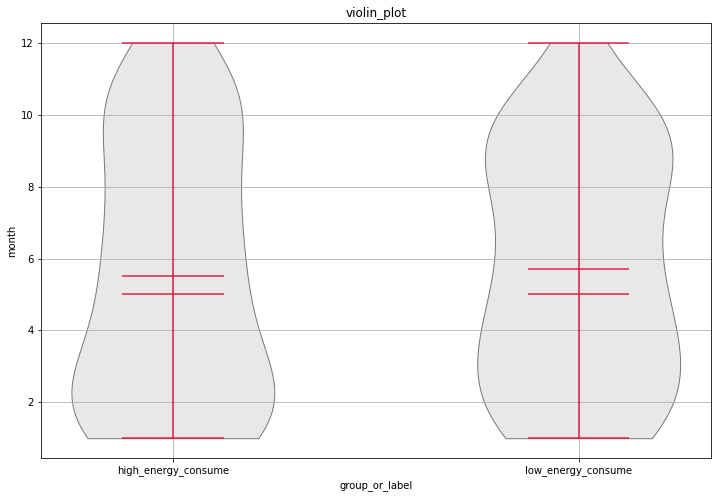



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots; 
# ORIENTATION = 'horizontal', for horizontal plots.
    
REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = labelled_df #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'consume_group' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'month' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column 
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and 
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes.     
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).
    
# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries. 
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string). 
# If you do not want to declare a series, simply keep as None, but do not remove or rename a 
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label 
# (you can pass 'label': None, but if values_to_analyze' is None, the new 
# dictionary will be ignored).
    
# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'}, 
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)    
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.     
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown    
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False    
# Manipulate parameter notch (boolean, default: False) from the boxplot object    
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True), 
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).     
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = 'month' #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = ewf.anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


If an error message is shown, update statsmodels. Declare and run a cell as:
!pip install statsmodels --upgrade

Data to be plotted in a same column.

2 different labels detected: ['high_energy_consume', 'low_energy_consume'].

Analysis of variance (ANOVA) for the 2 detected series:

Total of samples in each group used for ANOVA (after padding): 63

Probability that the means of the groups are the same = 82.51% (p-value = 8.250827e-01)

Calculated F-statistic for the variances = 4.905523e-02

For a confidence level of 95%, we can accept the null hypothesis.
The means are equal for a 95% confidence level.


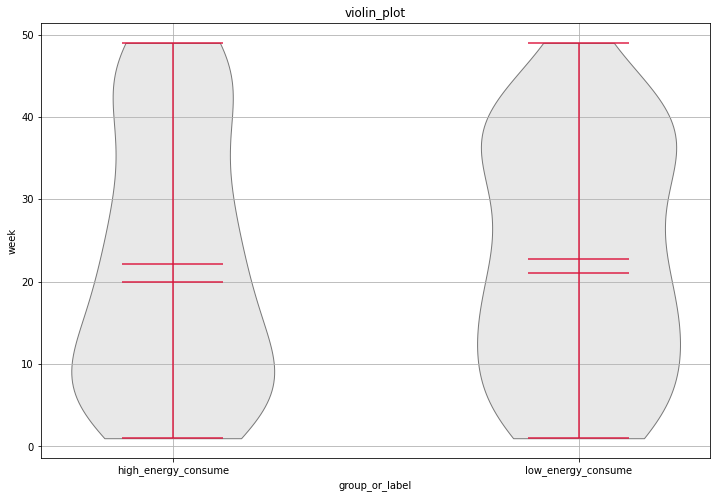



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots; 
# ORIENTATION = 'horizontal', for horizontal plots.
    
REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = labelled_df #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'consume_group' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'week' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column 
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and 
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes.     
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).
    
# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries. 
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string). 
# If you do not want to declare a series, simply keep as None, but do not remove or rename a 
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label 
# (you can pass 'label': None, but if values_to_analyze' is None, the new 
# dictionary will be ignored).
    
# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'}, 
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)    
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.     
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown    
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False    
# Manipulate parameter notch (boolean, default: False) from the boxplot object    
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True), 
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).     
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = 'week' #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = ewf.anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


If an error message is shown, update statsmodels. Declare and run a cell as:
!pip install statsmodels --upgrade

Data to be plotted in a same column.

2 different labels detected: ['high_energy_consume', 'low_energy_consume'].

Analysis of variance (ANOVA) for the 2 detected series:

Total of samples in each group used for ANOVA (after padding): 63

Probability that the means of the groups are the same = 90.61% (p-value = 9.061071e-01)

Calculated F-statistic for the variances = 1.396962e-02

For a confidence level of 95%, we can accept the null hypothesis.
The means are equal for a 95% confidence level.


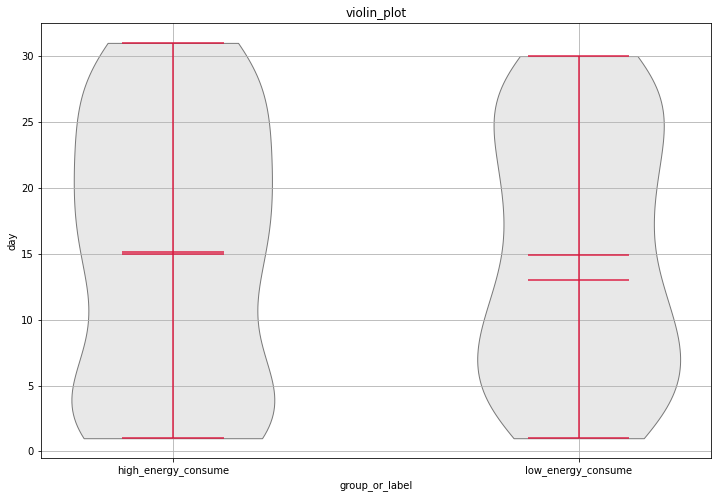



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots; 
# ORIENTATION = 'horizontal', for horizontal plots.
    
REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = labelled_df #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'consume_group' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'day' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column 
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and 
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes.     
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).
    
# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries. 
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string). 
# If you do not want to declare a series, simply keep as None, but do not remove or rename a 
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label 
# (you can pass 'label': None, but if values_to_analyze' is None, the new 
# dictionary will be ignored).
    
# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'}, 
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)    
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.     
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown    
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False    
# Manipulate parameter notch (boolean, default: False) from the boxplot object    
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True), 
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).     
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = 'day' #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = ewf.anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


If an error message is shown, update statsmodels. Declare and run a cell as:
!pip install statsmodels --upgrade

Data to be plotted in a same column.

2 different labels detected: ['high_energy_consume', 'low_energy_consume'].

Analysis of variance (ANOVA) for the 2 detected series:

Total of samples in each group used for ANOVA (after padding): 63

Probability that the means of the groups are the same = 0.00% (p-value = 1.913367e-10)

Calculated F-statistic for the variances = 4.877622e+01

For a confidence level of 95.00%, we can reject the null hypothesis.
The means are different for a 95.00% confidence level.


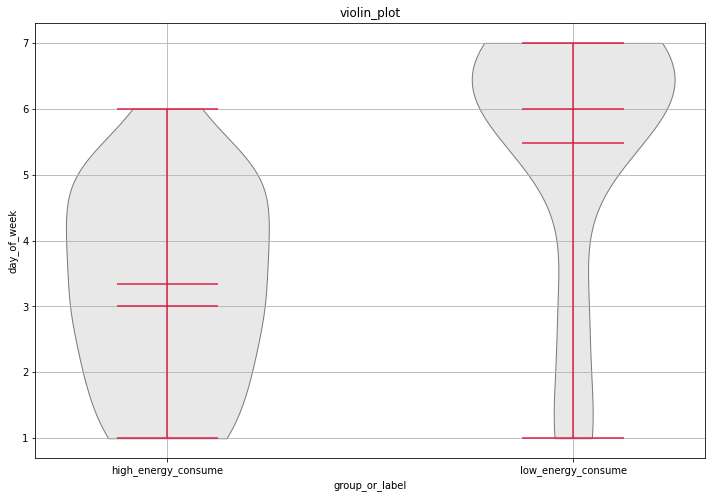



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots; 
# ORIENTATION = 'horizontal', for horizontal plots.
    
REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = labelled_df #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'consume_group' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'day_of_week' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column 
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and 
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes.     
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).
    
# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries. 
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string). 
# If you do not want to declare a series, simply keep as None, but do not remove or rename a 
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label 
# (you can pass 'label': None, but if values_to_analyze' is None, the new 
# dictionary will be ignored).
    
# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'}, 
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)    
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.     
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown    
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False    
# Manipulate parameter notch (boolean, default: False) from the boxplot object    
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True), 
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).     
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = 'day_of_week' #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = ewf.anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


In [ ]:
filter1 = (labelled_df['consume_group'] == 'low_energy_consume')
filter2 = (labelled_df['consume_group'] == 'high_energy_consume')
print(f"median (low) = {labelled_df[filter1]['day_of_week'].median()}")
print(f"mean (low) = {labelled_df[filter1]['day_of_week'].mean()}")
print(f"median (high) = {labelled_df[filter2]['day_of_week'].median()}")
print(f"mean (high) = {labelled_df[filter2]['day_of_week'].mean()}")

median (low) = 6.0
mean (low) = 5.476190476190476
median (high) = 3.0
mean (high) = 3.3333333333333335


If an error message is shown, update statsmodels. Declare and run a cell as:
!pip install statsmodels --upgrade

Data to be plotted in a same column.

2 different labels detected: ['high_energy_consume', 'low_energy_consume'].

Analysis of variance (ANOVA) for the 2 detected series:

Total of samples in each group used for ANOVA (after padding): 63

Probability that the means of the groups are the same = 7.45% (p-value = 7.454057e-02)

Calculated F-statistic for the variances = 3.235825e+00

For a confidence level of 95%, we can accept the null hypothesis.
The means are equal for a 95% confidence level.


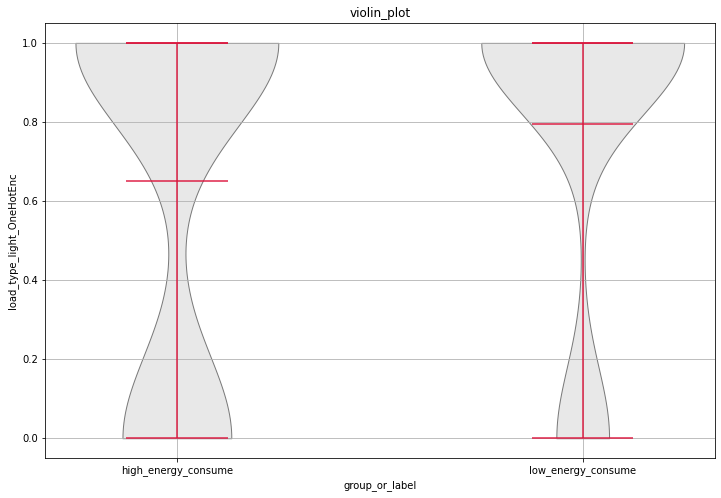



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots; 
# ORIENTATION = 'horizontal', for horizontal plots.
    
REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = labelled_df #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'consume_group' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'load_type_light_OneHotEnc' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column 
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and 
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes.     
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).
    
# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries. 
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string). 
# If you do not want to declare a series, simply keep as None, but do not remove or rename a 
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label 
# (you can pass 'label': None, but if values_to_analyze' is None, the new 
# dictionary will be ignored).
    
# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'}, 
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)    
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.     
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown    
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False    
# Manipulate parameter notch (boolean, default: False) from the boxplot object    
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True), 
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).     
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = 'load_type_light_OneHotEnc' #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = ewf.anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


If an error message is shown, update statsmodels. Declare and run a cell as:
!pip install statsmodels --upgrade

Data to be plotted in a same column.

2 different labels detected: ['high_energy_consume', 'low_energy_consume'].

Analysis of variance (ANOVA) for the 2 detected series:

Total of samples in each group used for ANOVA (after padding): 63

Probability that the means of the groups are the same = 57.44% (p-value = 5.743670e-01)

Calculated F-statistic for the variances = 3.171355e-01

For a confidence level of 95%, we can accept the null hypothesis.
The means are equal for a 95% confidence level.


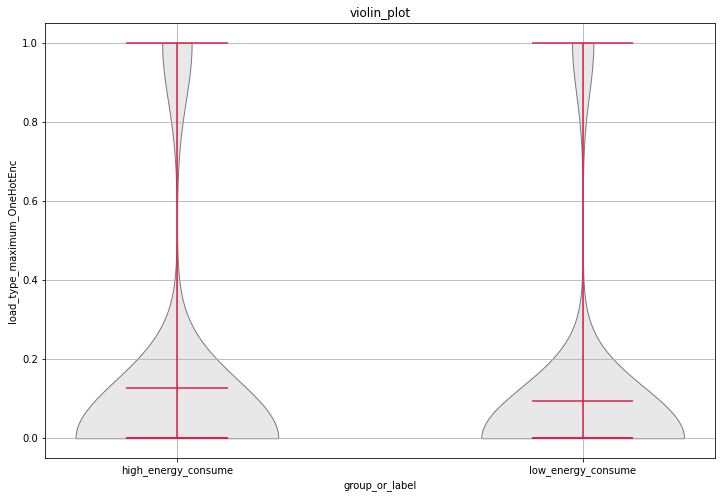



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots; 
# ORIENTATION = 'horizontal', for horizontal plots.
    
REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = labelled_df #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'consume_group' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'load_type_maximum_OneHotEnc' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column 
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and 
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes.     
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).
    
# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries. 
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string). 
# If you do not want to declare a series, simply keep as None, but do not remove or rename a 
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label 
# (you can pass 'label': None, but if values_to_analyze' is None, the new 
# dictionary will be ignored).
    
# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'}, 
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)    
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.     
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown    
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False    
# Manipulate parameter notch (boolean, default: False) from the boxplot object    
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True), 
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).     
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = 'load_type_maximum_OneHotEnc' #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = ewf.anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


If an error message is shown, update statsmodels. Declare and run a cell as:
!pip install statsmodels --upgrade

Data to be plotted in a same column.

2 different labels detected: ['high_energy_consume', 'low_energy_consume'].

Analysis of variance (ANOVA) for the 2 detected series:

Total of samples in each group used for ANOVA (after padding): 63

Probability that the means of the groups are the same = 9.59% (p-value = 9.590746e-02)

Calculated F-statistic for the variances = 2.818182e+00

For a confidence level of 95%, we can accept the null hypothesis.
The means are equal for a 95% confidence level.


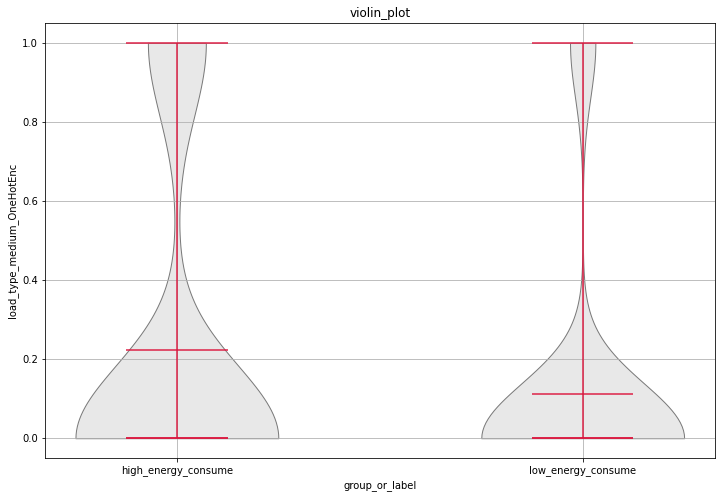



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots; 
# ORIENTATION = 'horizontal', for horizontal plots.
    
REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = labelled_df #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'consume_group' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'load_type_medium_OneHotEnc' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column 
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and 
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes.     
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).
    
# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries. 
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string). 
# If you do not want to declare a series, simply keep as None, but do not remove or rename a 
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label 
# (you can pass 'label': None, but if values_to_analyze' is None, the new 
# dictionary will be ignored).
    
# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'}, 
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)    
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.     
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown    
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False    
# Manipulate parameter notch (boolean, default: False) from the boxplot object    
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True), 
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).     
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = 'load_type_medium_OneHotEnc' #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = ewf.anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


If an error message is shown, update statsmodels. Declare and run a cell as:
!pip install statsmodels --upgrade

Data to be plotted in a same column.

2 different labels detected: ['high_energy_consume', 'low_energy_consume'].

Analysis of variance (ANOVA) for the 2 detected series:

Total of samples in each group used for ANOVA (after padding): 63

Probability that the means of the groups are the same = 0.00% (p-value = 1.544422e-27)

Calculated F-statistic for the variances = 2.731575e+02

For a confidence level of 95.00%, we can reject the null hypothesis.
The means are different for a 95.00% confidence level.


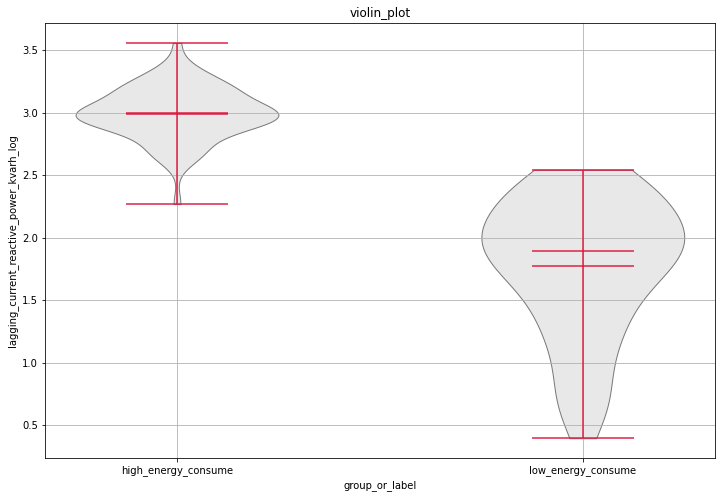



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots; 
# ORIENTATION = 'horizontal', for horizontal plots.
    
REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = labelled_df #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'consume_group' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'lagging_current_reactive_power_kvarh_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column 
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and 
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes.     
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).
    
# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries. 
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string). 
# If you do not want to declare a series, simply keep as None, but do not remove or rename a 
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label 
# (you can pass 'label': None, but if values_to_analyze' is None, the new 
# dictionary will be ignored).
    
# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'}, 
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)    
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.     
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown    
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False    
# Manipulate parameter notch (boolean, default: False) from the boxplot object    
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True), 
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).     
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = 'lagging_current_reactive_power_kvarh_log' #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = ewf.anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


In [ ]:
filter1 = (labelled_df['consume_group'] == 'low_energy_consume')
filter2 = (labelled_df['consume_group'] == 'high_energy_consume')
print(f"median (low) = {labelled_df[filter1]['lagging_current_reactive_power_kvarh_log'].median()}")
print(f"mean (low) = {labelled_df[filter1]['lagging_current_reactive_power_kvarh_log'].mean()}")
print(f"median (high) = {labelled_df[filter2]['lagging_current_reactive_power_kvarh_log'].median()}")
print(f"mean (high) = {labelled_df[filter2]['lagging_current_reactive_power_kvarh_log'].mean()}")

median (low) = 1.89748241919863
mean (low) = 1.7700793049400558
median (high) = 2.9921843203383056
mean (high) = 2.9995413470626713


If an error message is shown, update statsmodels. Declare and run a cell as:
!pip install statsmodels --upgrade

Data to be plotted in a same column.

2 different labels detected: ['high_energy_consume', 'low_energy_consume'].

Analysis of variance (ANOVA) for the 2 detected series:

Total of samples in each group used for ANOVA (after padding): 63

Probability that the means of the groups are the same = 0.00% (p-value = 5.504519e-21)

Calculated F-statistic for the variances = 1.405525e+02

For a confidence level of 95.00%, we can reject the null hypothesis.
The means are different for a 95.00% confidence level.


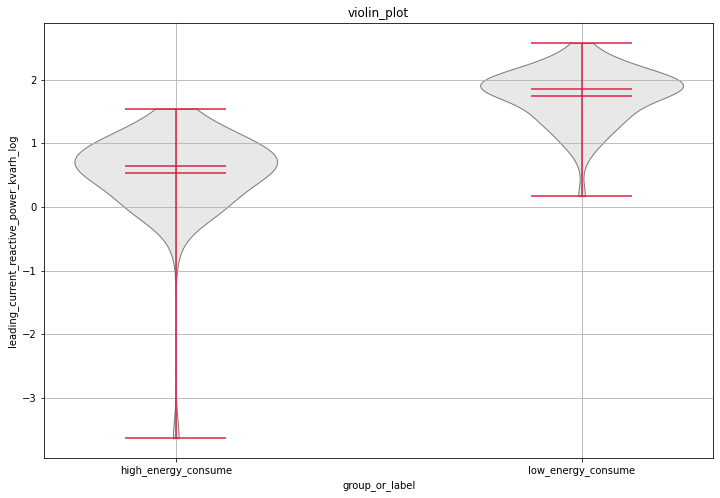



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots; 
# ORIENTATION = 'horizontal', for horizontal plots.
    
REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = labelled_df #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'consume_group' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'leading_current_reactive_power_kvarh_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column 
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and 
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes.     
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).
    
# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries. 
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string). 
# If you do not want to declare a series, simply keep as None, but do not remove or rename a 
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label 
# (you can pass 'label': None, but if values_to_analyze' is None, the new 
# dictionary will be ignored).
    
# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'}, 
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)    
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.     
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown    
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False    
# Manipulate parameter notch (boolean, default: False) from the boxplot object    
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True), 
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).     
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = 'leading_current_reactive_power_kvarh_log' #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = ewf.anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


In [ ]:
filter1 = (labelled_df['consume_group'] == 'low_energy_consume')
filter2 = (labelled_df['consume_group'] == 'high_energy_consume')
print(f"median (low) = {labelled_df[filter1]['leading_current_reactive_power_kvarh_log'].median()}")
print(f"mean (low) = {labelled_df[filter1]['leading_current_reactive_power_kvarh_log'].mean()}")
print(f"median (high) = {labelled_df[filter2]['leading_current_reactive_power_kvarh_log'].median()}")
print(f"mean (high) = {labelled_df[filter2]['leading_current_reactive_power_kvarh_log'].mean()}")

median (low) = 1.848572916166356
mean (low) = 1.752273301401618
median (high) = 0.6515870664742329
mean (high) = 0.5372397108741531


If an error message is shown, update statsmodels. Declare and run a cell as:
!pip install statsmodels --upgrade

Data to be plotted in a same column.

2 different labels detected: ['high_energy_consume', 'low_energy_consume'].

Analysis of variance (ANOVA) for the 2 detected series:

Total of samples in each group used for ANOVA (after padding): 63

Probability that the means of the groups are the same = 0.00% (p-value = 1.494283e-27)

Calculated F-statistic for the variances = 2.738722e+02

For a confidence level of 95.00%, we can reject the null hypothesis.
The means are different for a 95.00% confidence level.


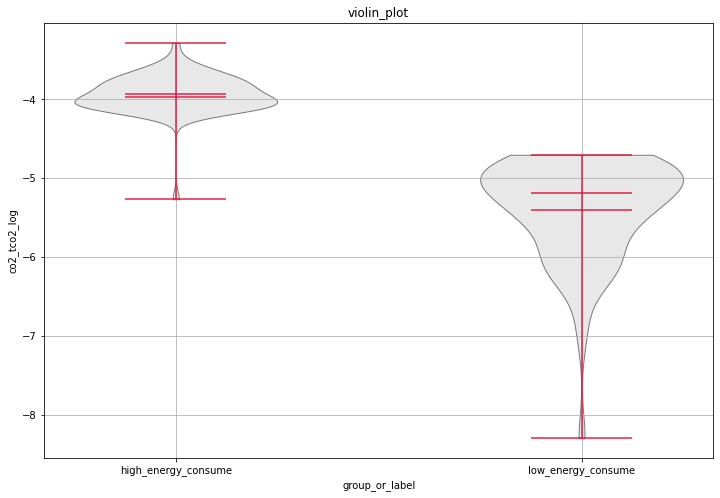



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots; 
# ORIENTATION = 'horizontal', for horizontal plots.
    
REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = labelled_df #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'consume_group' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'co2_tco2_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column 
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and 
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes.     
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).
    
# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries. 
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string). 
# If you do not want to declare a series, simply keep as None, but do not remove or rename a 
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label 
# (you can pass 'label': None, but if values_to_analyze' is None, the new 
# dictionary will be ignored).
    
# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'}, 
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)    
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.     
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown    
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False    
# Manipulate parameter notch (boolean, default: False) from the boxplot object    
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True), 
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).     
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = 'co2_tco2_log' #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = ewf.anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


In [ ]:
filter1 = (labelled_df['consume_group'] == 'low_energy_consume')
filter2 = (labelled_df['consume_group'] == 'high_energy_consume')
print(f"median (low) = {labelled_df[filter1]['co2_tco2_log'].median()}")
print(f"mean (low) = {labelled_df[filter1]['co2_tco2_log'].mean()}")
print(f"median (high) = {labelled_df[filter2]['co2_tco2_log'].median()}")
print(f"mean (high) = {labelled_df[filter2]['co2_tco2_log'].mean()}")

median (low) = -5.187969309379177
mean (low) = -5.395585789609297
median (high) = -3.972126929497853
mean (high) = -3.9320573761386965


If an error message is shown, update statsmodels. Declare and run a cell as:
!pip install statsmodels --upgrade

Data to be plotted in a same column.

2 different labels detected: ['high_energy_consume', 'low_energy_consume'].

Analysis of variance (ANOVA) for the 2 detected series:

Total of samples in each group used for ANOVA (after padding): 63

Probability that the means of the groups are the same = 1.76% (p-value = 1.755703e-02)

Calculated F-statistic for the variances = 5.793799e+00

For a confidence level of 95.00%, we can reject the null hypothesis.
The means are different for a 95.00% confidence level.


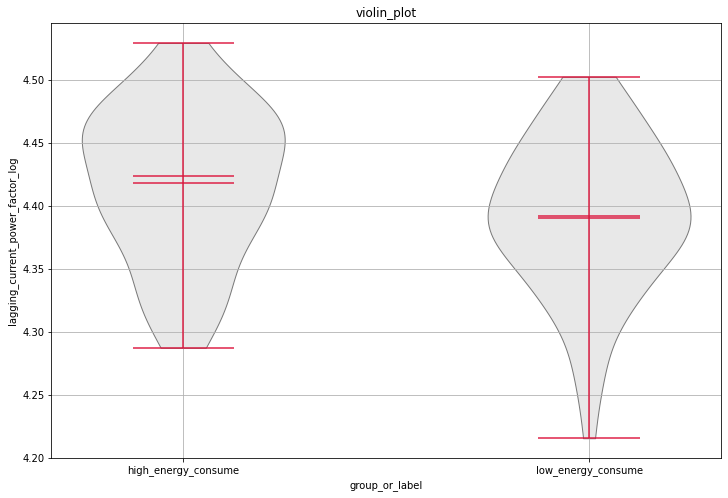



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots; 
# ORIENTATION = 'horizontal', for horizontal plots.
    
REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = labelled_df #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'consume_group' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'lagging_current_power_factor_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column 
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and 
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes.     
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).
    
# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries. 
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string). 
# If you do not want to declare a series, simply keep as None, but do not remove or rename a 
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label 
# (you can pass 'label': None, but if values_to_analyze' is None, the new 
# dictionary will be ignored).
    
# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'}, 
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)    
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.     
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown    
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False    
# Manipulate parameter notch (boolean, default: False) from the boxplot object    
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True), 
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).     
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = 'lagging_current_power_factor_log' #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = ewf.anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


In [ ]:
filter1 = (labelled_df['consume_group'] == 'low_energy_consume')
filter2 = (labelled_df['consume_group'] == 'high_energy_consume')
print(f"median (low) = {labelled_df[filter1]['lagging_current_power_factor_log'].median()}")
print(f"mean (low) = {labelled_df[filter1]['lagging_current_power_factor_log'].mean()}")
print(f"median (high) = {labelled_df[filter2]['lagging_current_power_factor_log'].median()}")
print(f"mean (high) = {labelled_df[filter2]['lagging_current_power_factor_log'].mean()}")

median (low) = 4.389970002428193
mean (low) = 4.391614230215782
median (high) = 4.42358235994788
mean (high) = 4.417771306261925


If an error message is shown, update statsmodels. Declare and run a cell as:
!pip install statsmodels --upgrade

Data to be plotted in a same column.

2 different labels detected: ['high_energy_consume', 'low_energy_consume'].

Analysis of variance (ANOVA) for the 2 detected series:

Total of samples in each group used for ANOVA (after padding): 63

Probability that the means of the groups are the same = 0.00% (p-value = 8.944594e-24)

Calculated F-statistic for the variances = 2.247284e+02

For a confidence level of 95.00%, we can reject the null hypothesis.
The means are different for a 95.00% confidence level.


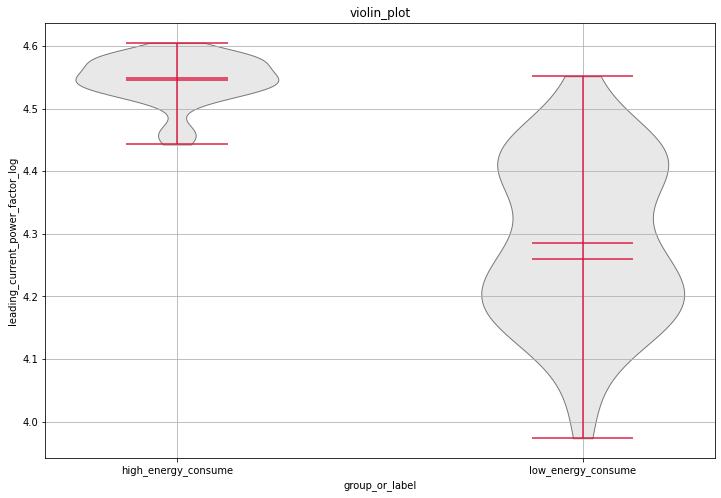



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots; 
# ORIENTATION = 'horizontal', for horizontal plots.
    
REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = labelled_df #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'consume_group' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'leading_current_power_factor_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column 
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and 
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes.     
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).
    
# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries. 
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string). 
# If you do not want to declare a series, simply keep as None, but do not remove or rename a 
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label 
# (you can pass 'label': None, but if values_to_analyze' is None, the new 
# dictionary will be ignored).
    
# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'}, 
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)    
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.     
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown    
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False    
# Manipulate parameter notch (boolean, default: False) from the boxplot object    
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True), 
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).     
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = 'leading_current_power_factor_log' #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = ewf.anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


In [ ]:
filter1 = (labelled_df['consume_group'] == 'low_energy_consume')
filter2 = (labelled_df['consume_group'] == 'high_energy_consume')
print(f"median (low) = {labelled_df[filter1]['leading_current_power_factor_log'].median()}")
print(f"mean (low) = {labelled_df[filter1]['leading_current_power_factor_log'].mean()}")
print(f"median (high) = {labelled_df[filter2]['leading_current_power_factor_log'].median()}")
print(f"mean (high) = {labelled_df[filter2]['leading_current_power_factor_log'].mean()}")

median (low) = 4.259151358666352
mean (low) = 4.285514976605288
median (high) = 4.54935880566746
mean (high) = 4.545794141251328


If an error message is shown, update statsmodels. Declare and run a cell as:
!pip install statsmodels --upgrade

Data to be plotted in a same column.

2 different labels detected: ['high_energy_consume', 'low_energy_consume'].

Analysis of variance (ANOVA) for the 2 detected series:

Total of samples in each group used for ANOVA (after padding): 63

Probability that the means of the groups are the same = 40.42% (p-value = 4.041630e-01)

Calculated F-statistic for the variances = 7.007994e-01

For a confidence level of 95%, we can accept the null hypothesis.
The means are equal for a 95% confidence level.


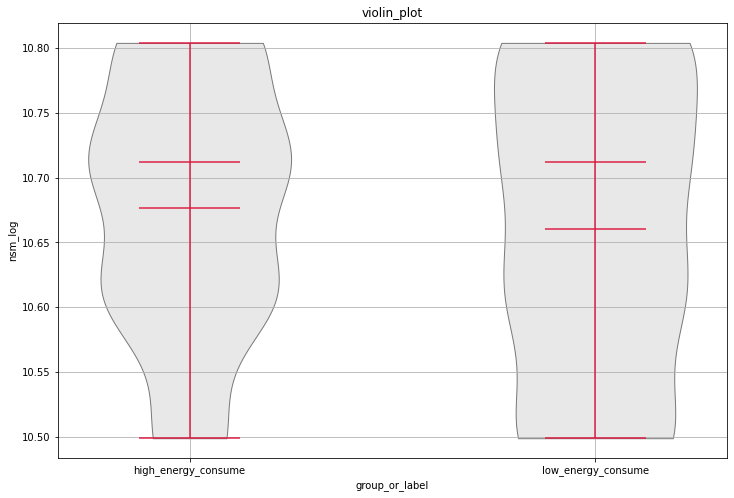



Successfully returned 2 dictionaries: anova_summary_dict (dictionary storing ANOVA F-test and p-value); and plot_returned_dict (dictionary mapping each component of the plot).

Violin plot interpretation:

A violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side of the violin.

So, this plot also shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

Typically a violin plot will include all the data that is in a box plot.

It includes a filled area extending to represent the entire data range; with lines at the mean, the median, the minimum, and the maximum.

So, let's firstly check the box plot components.
Notice that the interquartile range represented by the main box will not be present.
The violin plot replaces this box region by the density distribution itself.

Main box
The main box represents the Interquartile Range (IQR).
It represents the data that is from quartile Q1 to q

In [ ]:
PLOT_TYPE = 'violin'
# PLOT_TYPE = 'box' to plot a boxplot.
# PLOT_TYPE = 'violin' to plot a violinplot.
# If PLOT_TYPE = None, or PLOT_TYPE = 'only_anova', only the anova analysis will be performed.

CONFIDENCE_LEVEL_PERCENT = 95
# CONFIDENCE_LEVEL_PERCENT = 95 = 95% confidence
# It is the percent of confidence for the analysis.
# Set CONFIDENCE_LEVEL_PERCENT = 90 to get 0.90 = 90% confidence in the analysis.
# Notice that, when less trust is needed, we can reduce confidence_level_pct
# to get less restrictive results.

ORIENTATION = 'vertical'
# ORIENTATION = 'vertical' for vertical plots; 
# ORIENTATION = 'horizontal', for horizontal plots.
    
REFERENCE_VALUE = None
# REFERENCE_VALUE: keep it as None or add a float value.
# This reference value will be shown as a red constant line to be compared
# with the plots. e.g. REFERENCE_VALUE = 1.0 will plot a red line passing through
# VARIABLE_TO_ANALYZE = 1.0

DATA_IN_SAME_COLUMN = True

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = labelled_df #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_LABELS_OR_GROUPS = 'consume_group' # Alternatively: correct name for X-column
VARIABLE_TO_ANALYZE = 'nsm_log' # Alternatively: correct name for Y-column

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the label or group indication as COLUMN_WITH_LABELS_OR_GROUPS; and the column 
# containing the variable to analyze as VARIABLE_TO_ANALYZE.

# If COLUMN_WITH_LABELS_OR_GROUPS is None, the ANOVA analysis will not be performed and 
# the plot will be obtained for the whole series.

# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes.     
# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results'. If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_LABELS_OR_GROUPS = 'group',
# VARIABLE_TO_ANALYZE = 'results'.


# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_LABELS_OR_GROUPS = None, VARIABLE_TO_ANALYZE = None).
    
# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    {'values_to_analyze': None, 'label': None}, 
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: {'values_to_analyze': None, 'label': None}
# if data is already converted to series, lists or arrays, provide them as a list of dictionaries. 
# It must be declared as a list, in brackets, even if there is a single dictionary.
# Use always the same keys: 'values_to_analyze' for values that will be analyzed, and 'label' for
# the label or group correspondent to the series (may be a number or a string). 
# If you do not want to declare a series, simply keep as None, but do not remove or rename a 
# key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'values_to_analyze': y, 'label': 'series_y'}, where y represents the values
# to analyze, and 'series_y' is the label 
# (you can pass 'label': None, but if values_to_analyze' is None, the new 
# dictionary will be ignored).
    
# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [{'values_to_analyze': y, 'label': 0}]
# will plot a single variable. In turns: LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'values_to_analyze': DATASET['Y1'], 'label': 'label1'}, 
# {'values_to_analyze': DATASET['Y2'], 'label': 'label2'}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 and Y2.
# Notice that all dictionaries where 'values_to_analyze' is None are automatically ignored.
# If None is provided to 'label', an automatic label will be generated.

## Parameters with effect only for boxplots (PLOT_TYPE = 'box'):
OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True
# Manipulate parameter patch_artist (boolean, default: False)    
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = True, the boxes are created filled.     
# If OBTAIN_BOXPLOT_WITH_FILLED_BOXES = False, only the contour of the boxes are shown    
# (obtain void white boxes).
OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False
# OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False    
# Manipulate parameter notch (boolean, default: False) from the boxplot object    
# Whether to draw a notched boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = True), 
# or a rectangular boxplot (OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES = False).     
# The notches represent the confidence interval (CI) around the median.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = 'nsm_log' #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# '{PLOT_TYPE}_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Dictionary storing ANOVA F-test and p-value returned as anova_summary_dict
# Dictionary mapping each component of the box or violin plot returned as plot_returned_dict
# Simply modify these objects on the left of equality:
anova_summary_dict, plot_returned_dict = ewf.anova_box_violin_plot (plot_type = PLOT_TYPE, confidence_level_pct = CONFIDENCE_LEVEL_PERCENT, orientation = ORIENTATION, reference_value = REFERENCE_VALUE, data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_labels_or_groups = COLUMN_WITH_LABELS_OR_GROUPS, variable_to_analyze = VARIABLE_TO_ANALYZE, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, obtain_boxplot_with_filled_boxes = OBTAIN_BOXPLOT_WITH_FILLED_BOXES, obtain_boxplot_with_notched_boxes = OBTAIN_BOXPLOT_WITH_NOTCHED_BOXES, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


## **Exporting the dataframe as CSV file (to notebook's workspace)**

In [ ]:
## WARNING: all files exported from this function are .csv (comma separated values)

DATAFRAME_OBJ_TO_BE_EXPORTED = labelled_df
# Alternatively: object containing the dataset to be exported.
# DATAFRAME_OBJ_TO_BE_EXPORTED: dataframe object that is going to be exported from the
# function. Since it is an object (not a string), it should not be declared in quotes.
# example: DATAFRAME_OBJ_TO_BE_EXPORTED = dataset will export the dataset object.
# ATTENTION: The dataframe object must be a Pandas dataframe.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = "" 
# or FILE_DIRECTORY_PATH = "folder"
# If you want to export the file to AWS S3, this parameter will have no effect.
# In this case, you can set FILE_DIRECTORY_PATH = None

NEW_FILE_NAME_WITHOUT_EXTENSION = "labelled_df_low_high_consume"
# NEW_FILE_NAME_WITHOUT_EXTENSION - (string, in quotes): input the name of the 
# file without the extension. e.g. set NEW_FILE_NAME_WITHOUT_EXTENSION = "my_file" 
# to export the CSV file 'my_file.csv' to notebook's workspace.

idsw.export_pd_dataframe_as_csv (dataframe_obj_to_be_exported = DATAFRAME_OBJ_TO_BE_EXPORTED, new_file_name_without_extension = NEW_FILE_NAME_WITHOUT_EXTENSION, file_directory_path = FILE_DIRECTORY_PATH)

Dataframe labelled_df_low_high_consume exported as CSV file to notebook's workspace as 'labelled_df_low_high_consume.csv'.


## **Downloading a file from Google Colab to the local machine; or uploading a file from the machine to Colab's instant memory**

#### Case 2: download a file from Colab's workspace

In [ ]:
ACTION = 'download'
# ACTION = 'download' to download the file to the local machine
# ACTION = 'upload' to upload a file from local machine to Google Colab's 
# instant memory

FILE_TO_DOWNLOAD_FROM_COLAB = "labelled_df_low_high_consume.csv"
# FILE_TO_DOWNLOAD_FROM_COLAB = None. This parameter is obbligatory when
# action = 'download'. 
# Declare as FILE_TO_DOWNLOAD_FROM_COLAB the file that you want to download, with
# the correspondent extension.
# It should not be declared in quotes.
# e.g. to download a dictionary named dict, FILE_TO_DOWNLOAD_FROM_COLAB = 'dict.pkl'
# To download a dataframe named df, declare FILE_TO_DOWNLOAD_FROM_COLAB = 'df.csv'
# To export a model nameACTION = 'upload'
# ACTION = 'download' to download the file to the local machine
# ACTION = 'upload' to upload a file from local machine to Google Colab's 
# instant memory

idsw.upload_to_or_download_file_from_colab (action = ACTION, file_to_download_from_colab = FILE_TO_DOWNLOAD_FROM_COLAB)

The file will be downloaded to your computer.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File labelled_df_low_high_consume.csv successfully downloaded from Colab environment.


****